In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
I = np.arange(0.,60.,0.1)*1e6/86400
Tkel = 273.15
T = np.linspace(0,8,50)

In [11]:
Ki = 1e-3 * np.linspace(.95,6.1,5)
Kpcons = 0.12e-1
# Fo = Kpcons*Ki/(Kpcons+Ki)**2 * np.exp(Ki/Kpcons)
Fo = Kpcons/(Kpcons+Ki)*np.exp(Ki/Kpcons*np.log(Ki/(Kpcons+Ki)))

gammaIi = Fo[:,np.newaxis]**-1 * (1.-np.exp(-Kpcons*I)) * np.exp(-Ki[:,np.newaxis]*I)
gammaIi.shape

(5, 600)

In [15]:
Kicons = 3e-3
Kp = 1e-1 * np.linspace(0.06,0.32,5)
# Fo = Kp*Kicons/(Kp+Kicons)**2 * np.exp(Kicons/Kp)
Fo = Kp/(Kp+Kicons)*np.exp(Kicons/Kp*np.log(Kicons/(Kp+Kicons)))

gammaIp = Fo[:,np.newaxis]**-1 * (1.-np.exp(-Kp[:,np.newaxis]*I)) * np.exp(-Kicons*I)
gammaIp.shape

(5, 600)

In [61]:
TAe = -4040.
Tref = np.linspace(0.,30.,5) + Tkel
Tnorm = 0.
Tcoeff = .589

gammaT = (np.exp(TAe*((T[np.newaxis,:]+Tkel)**-1 - Tref[:,np.newaxis]**-1)) - Tnorm) * Tcoeff

Text(0.5,0,'[$^\\circ$C]')

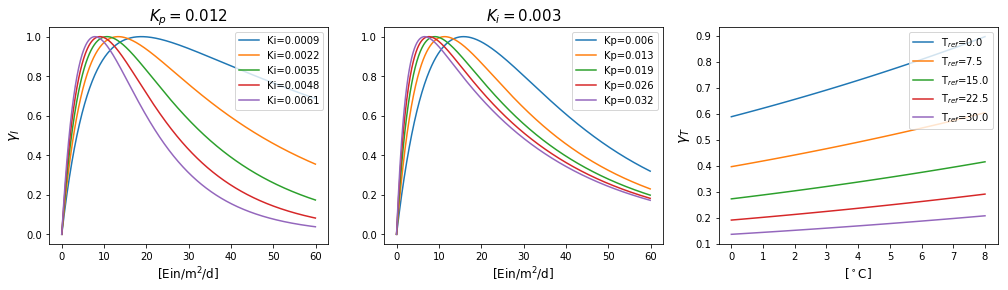

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
for i in range(5):
    ax1.plot(I*1e-6*86400, gammaIi[i], label=r"Ki=%0.4f" % Ki[i])
    ax2.plot(I*1e-6*86400, gammaIp[i], label=r"Kp=%0.3f" % Kp[i])
    ax3.plot(T, gammaT[i], label=r"T$_{ref}$=%3s" % str(Tref[i]-Tkel))
ax1.set_title(r"$K_p=0.012$", fontsize=15)
ax2.set_title(r"$K_i=0.003$", fontsize=15)
# ax3.set_title(r"$K_T$", fontsize=15)
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax1.set_ylabel(r"$\gamma_I$", fontsize=14)
ax1.set_xlabel(r"[Ein/m$^2$/d]", fontsize=12)
# ax2.set_ylabel(r"$\gamma^I$")
ax2.set_xlabel(r"[Ein/m$^2$/d]", fontsize=12)
ax3.set_ylabel(r"$\gamma_T$", fontsize=14)
ax3.set_xlabel(r"[$^\circ$C]", fontsize=12)